In [2]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)


In [3]:
data = pd.read_csv('../input/co2-emission/CO2 Emissions_Canada.csv');
data_bk = data.copy()
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.shape

(10310, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10310 entries, 0 to 10309
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              10310 non-null  object 
 1   Model                             10310 non-null  object 
 2   Vehicle Class                     10310 non-null  object 
 3   Engine Size(L)                    10310 non-null  float64
 4   Cylinders                         10310 non-null  int64  
 5   Transmission                      10310 non-null  object 
 6   Fuel Type                         10310 non-null  object 
 7   Fuel Consumption City (L/100 km)  10310 non-null  float64
 8   Fuel Consumption Hwy (L/100 km)   10310 non-null  float64
 9   Fuel Consumption Comb (L/100 km)  10310 non-null  float64
 10  Fuel Consumption Comb (mpg)       10310 non-null  int64  
 11  CO2 Emissions(g/km)               10310 non-null  int64  
dtypes: f

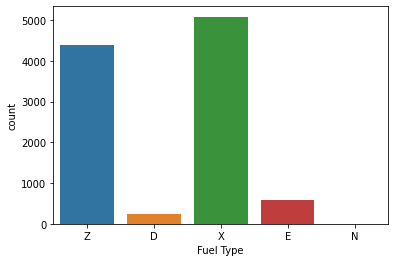

In [10]:
sns.countplot(x = data['Fuel Type'],
            data = data)
 
# Show the plot
plt.show()

In [ ]:
sns.plot()

In [25]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [26]:
data = data.drop(['Make','Model','Vehicle Class','Transmission'],axis=1)

In [27]:
data['Fuel Type'].nunique()

5

In [28]:
data = pd.get_dummies(data, columns = ['Fuel Type'])

In [29]:
data.head()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,0,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10310 entries, 0 to 10309
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    10310 non-null  float64
 1   Cylinders                         10310 non-null  int64  
 2   Fuel Consumption City (L/100 km)  10310 non-null  float64
 3   Fuel Consumption Hwy (L/100 km)   10310 non-null  float64
 4   Fuel Consumption Comb (L/100 km)  10310 non-null  float64
 5   Fuel Consumption Comb (mpg)       10310 non-null  int64  
 6   CO2 Emissions(g/km)               10310 non-null  int64  
 7   Fuel Type_D                       10310 non-null  uint8  
 8   Fuel Type_E                       10310 non-null  uint8  
 9   Fuel Type_N                       10310 non-null  uint8  
 10  Fuel Type_X                       10310 non-null  uint8  
 11  Fuel Type_Z                       10310 non-null  uint8  
dtypes: f

<AxesSubplot:xlabel='Engine Size(L)'>

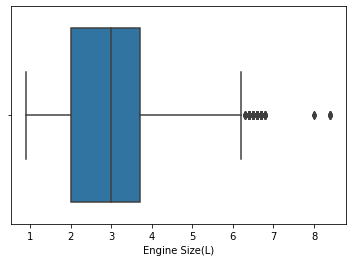

In [16]:
sns.boxplot(x=data['Engine Size(L)'])


<AxesSubplot:xlabel='Cylinders'>

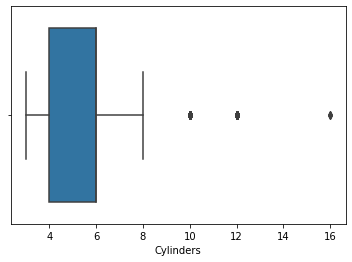

In [17]:
sns.boxplot(x=data['Cylinders'])

<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

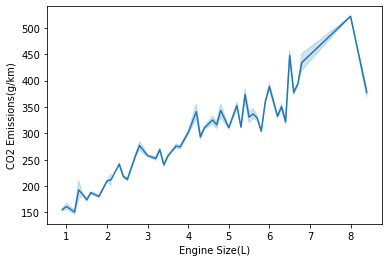

In [18]:
sns.lineplot(x=data['Engine Size(L)'],y=data['CO2 Emissions(g/km)'])

<AxesSubplot:>

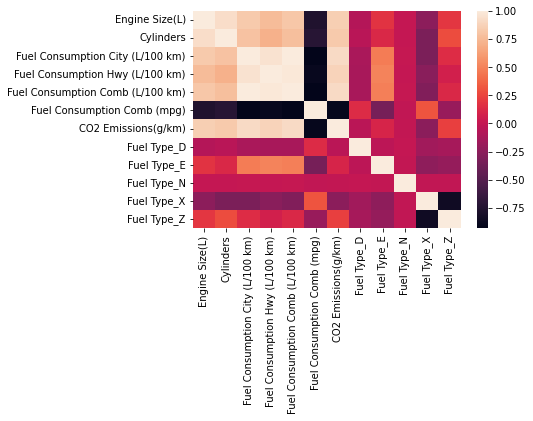

In [31]:
sns.heatmap(data.corr())

In [32]:
X = data.drop(['CO2 Emissions(g/km)'],axis=1)
X

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10305,3.5,6,16.2,11.9,14.3,20,0,0,0,1,0
10306,3.5,6,16.1,12.4,14.4,20,0,0,0,1,0
10307,3.0,6,14.1,9.8,12.2,23,0,0,0,0,1
10308,3.0,6,14.5,10.0,12.5,23,0,0,0,0,1


In [33]:
y = data['CO2 Emissions(g/km)']
y

0        196
1        221
2        136
3        255
4        244
        ... 
10305    334
10306    339
10307    286
10308    293
10309    295
Name: CO2 Emissions(g/km), Length: 10310, dtype: int64

In [34]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8248, 11), (2062, 11), (8248,), (2062,))

In [35]:
# Load the result dataset
EMResults = pd.read_csv('../input/hr-results-reg/HR results.csv', header=0)
FinalResults = pd.read_csv('../input/hr-results-reg/HR results.csv',header=0)
EMResults.head()

,Model,Mean absolute error(MAE),Mean square error(MSE),Root mean square erroe(RMSE),R2_score,Root mean square log error(RMSLE),Mean absolute percentage error(MAPE),Adjusted R square


Model Name:  LinearRegression()

Mean Absolute Error (MAE): 3.268

Mean Squared Error (MSE): 27.18

Root Mean Squared Error (RMSE): 5.213

R2_score: 0.992083

Root Mean Squared Log Error (RMSLE): 1.651

Mean Absolute Percentage Error (MAPE): 1.358 %

Adj R Square:  0.992075


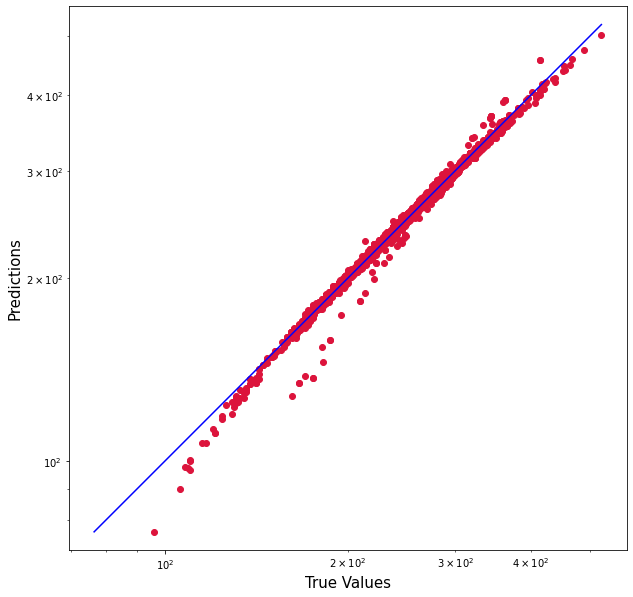

-----------------------------------------------------------------------------------------------------
Model Name:  LogisticRegression()

Mean Absolute Error (MAE): 13.191

Mean Squared Error (MSE): 395.753

Root Mean Squared Error (RMSE): 19.894

R2_score: 0.884721

Root Mean Squared Log Error (RMSLE): 2.99

Mean Absolute Percentage Error (MAPE): 5.18 %

Adj R Square:  0.884598


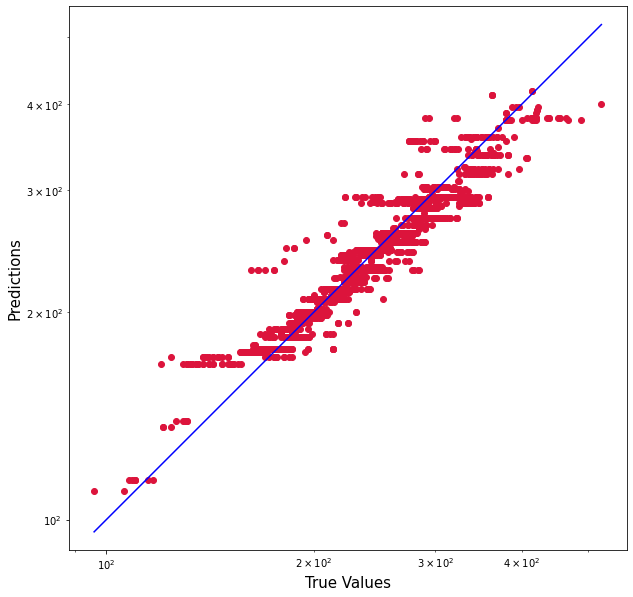

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()

Mean Absolute Error (MAE): 1.192

Mean Squared Error (MSE): 10.404

Root Mean Squared Error (RMSE): 3.226

R2_score: 0.996969

Root Mean Squared Log Error (RMSLE): 1.171

Mean Absolute Percentage Error (MAPE): 0.499 %

Adj R Square:  0.996966


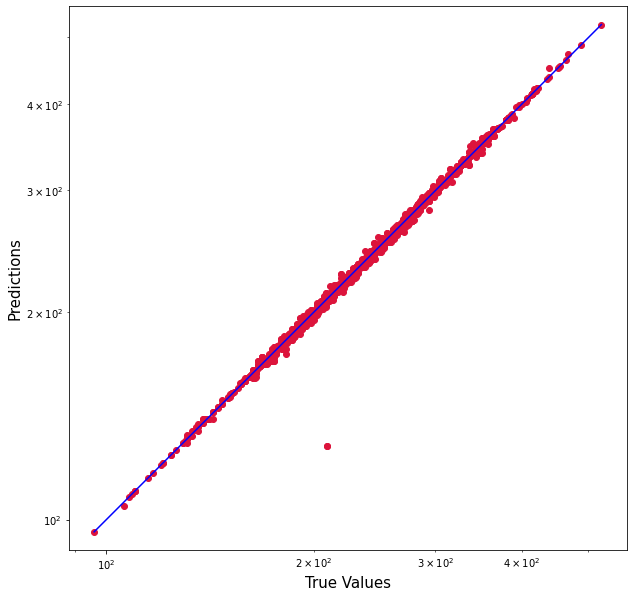

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesRegressor()

Mean Absolute Error (MAE): 1.085

Mean Squared Error (MSE): 3.719

Root Mean Squared Error (RMSE): 1.929

R2_score: 0.998917

Root Mean Squared Log Error (RMSLE): 0.657

Mean Absolute Percentage Error (MAPE): 0.449 %

Adj R Square:  0.998916


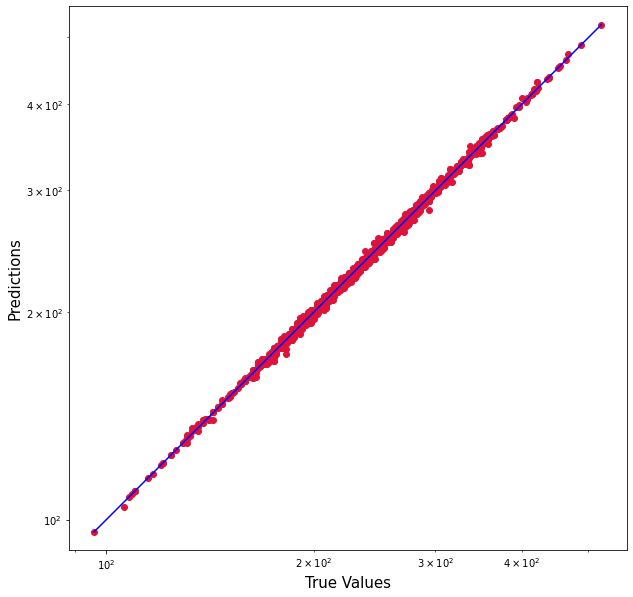

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()

Mean Absolute Error (MAE): 1.335

Mean Squared Error (MSE): 4.126

Root Mean Squared Error (RMSE): 2.031

R2_score: 0.998798

Root Mean Squared Log Error (RMSLE): 0.709

Mean Absolute Percentage Error (MAPE): 0.551 %

Adj R Square:  0.998797


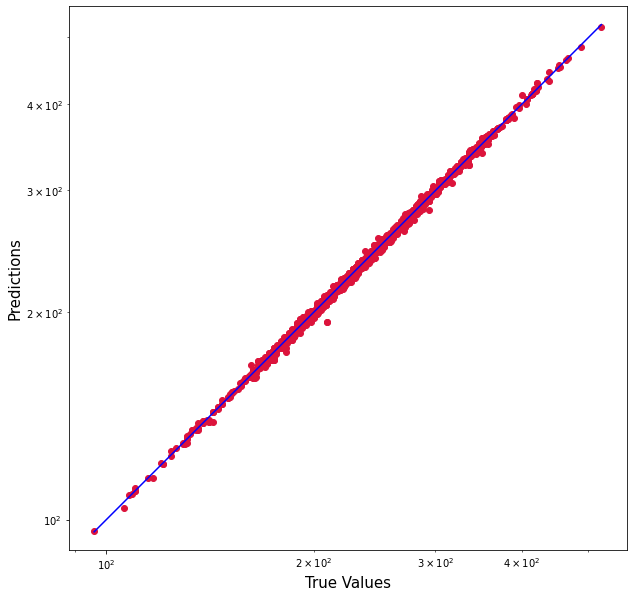

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor()

Mean Absolute Error (MAE): 2.137

Mean Squared Error (MSE): 21.542

Root Mean Squared Error (RMSE): 4.641

R2_score: 0.993725

Root Mean Squared Log Error (RMSLE): 1.535

Mean Absolute Percentage Error (MAPE): 0.841 %

Adj R Square:  0.993718


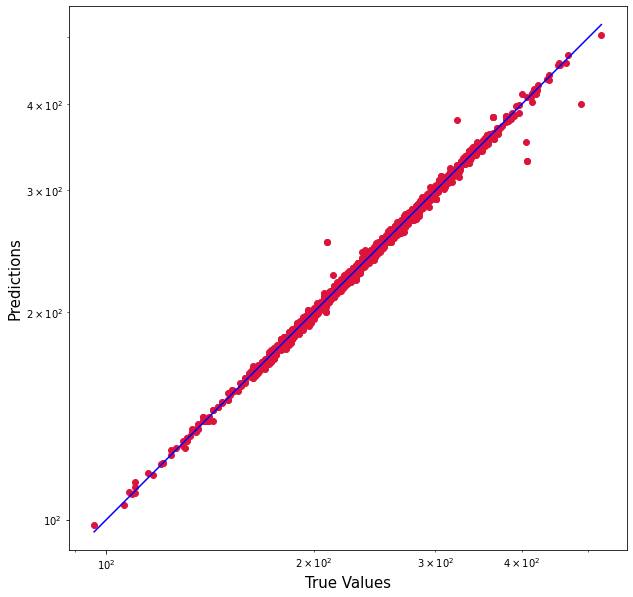

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianProcessRegressor()

Mean Absolute Error (MAE): 4.96

Mean Squared Error (MSE): 845.944

Root Mean Squared Error (RMSE): 29.085

R2_score: 0.753584

Root Mean Squared Log Error (RMSLE): 3.37

Mean Absolute Percentage Error (MAPE): 2.075 %

Adj R Square:  0.753321


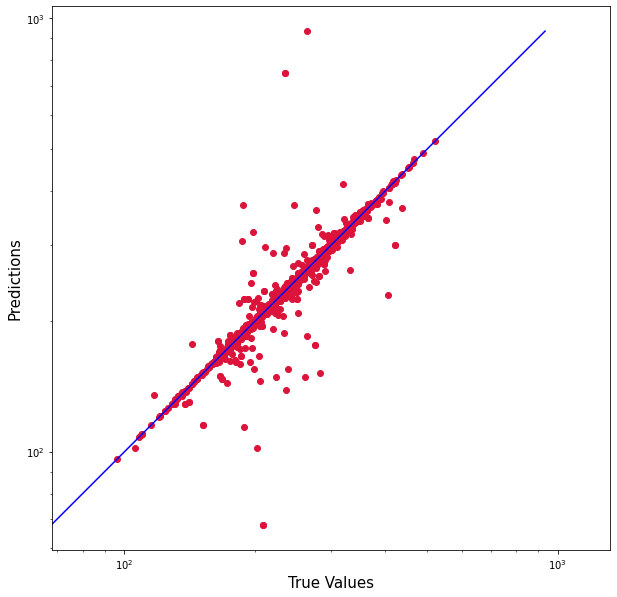

-----------------------------------------------------------------------------------------------------
Model Name:  Lasso()

Mean Absolute Error (MAE): 6.034

Mean Squared Error (MSE): 84.662

Root Mean Squared Error (RMSE): 9.201

R2_score: 0.975339

Root Mean Squared Log Error (RMSLE): 2.219

Mean Absolute Percentage Error (MAPE): 2.368 %

Adj R Square:  0.975313


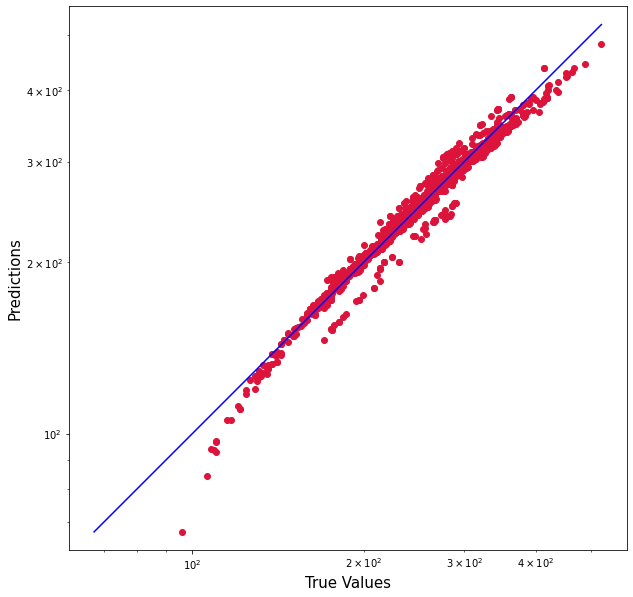

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingRegressor()

Mean Absolute Error (MAE): 2.518

Mean Squared Error (MSE): 9.941

Root Mean Squared Error (RMSE): 3.153

R2_score: 0.997104

Root Mean Squared Log Error (RMSLE): 1.148

Mean Absolute Percentage Error (MAPE): 1.022 %

Adj R Square:  0.997101


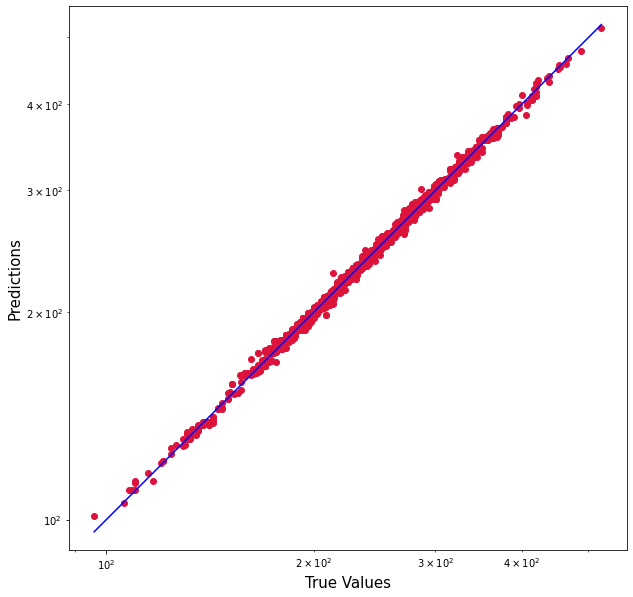

-----------------------------------------------------------------------------------------------------
Model Name:  SVR()

Mean Absolute Error (MAE): 8.737

Mean Squared Error (MSE): 390.413

Root Mean Squared Error (RMSE): 19.759

R2_score: 0.886276

Root Mean Squared Log Error (RMSLE): 2.984

Mean Absolute Percentage Error (MAPE): 3.432 %

Adj R Square:  0.886155


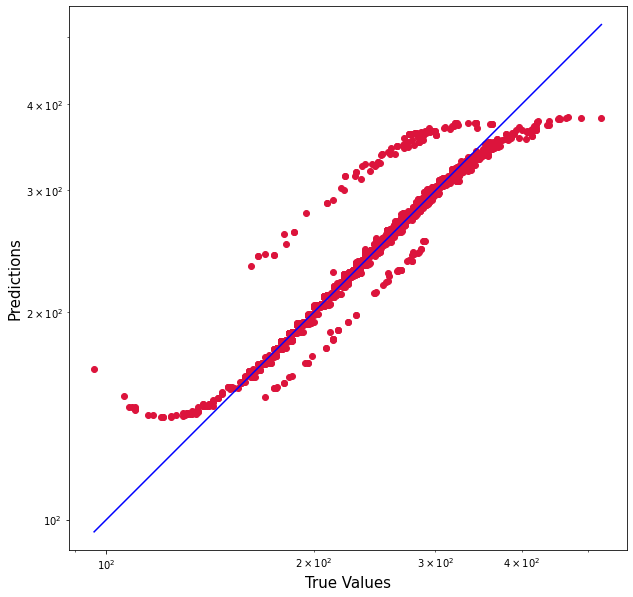

-----------------------------------------------------------------------------------------------------


In [36]:
# Build the Regression models and compare the results

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso


ModelLR = LinearRegression()
ModelLoR = LogisticRegression()
ModelDT = DecisionTreeRegressor()
ModelET = ExtraTreesRegressor()
ModelRF = RandomForestRegressor()
ModelKN = KNeighborsRegressor()
ModelGR = GaussianProcessRegressor()
ModelPF = Lasso()
ModelGB = GradientBoostingRegressor()
ModelSV = SVR()


# Evalution matrix for all the algorithms

MM = [ModelLR, ModelLoR, ModelDT, ModelET, ModelRF, ModelKN, ModelGR, ModelPF, ModelGB, ModelSV]
for models in MM:
    
    # Fit the model
    
    models.fit(X_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn import metrics
    
    MAE = round(metrics.mean_absolute_error(y_test, y_pred),3)
    MSE = round(metrics.mean_squared_error(y_test, y_pred),3)
    RMSE =  round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3)
    R2_score =  round(metrics.r2_score(y_test, y_pred),6)
    RMSLE = round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)
    

    print('\nMean Absolute Error (MAE):', MAE)  
    print('\nMean Squared Error (MSE):', MSE)  
    print('\nRoot Mean Squared Error (RMSE):',RMSE)
    print('\nR2_score:',R2_score)
    print('\nRoot Mean Squared Log Error (RMSLE):', RMSLE)

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred): 
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    MAPE=round(result, 3)
    print('\nMean Absolute Percentage Error (MAPE):',MAPE , '%')

    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('\nAdj R Square: ', adjusted_r_squared)
    
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred, c='crimson')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    new_row = {'Model':models,
               'Mean absolute error(MAE)':MAE,
               'Mean square error(MSE)':MSE,
              'Root mean square erroe(RMSE)': RMSE,
              'R2_score': R2_score,
               'Root mean square log error(RMSLE)':RMSLE,
              'Mean absolute percentage error(MAPE)': MAPE,
              'Adjusted R square': adjusted_r_squared}
    EMResults = EMResults.append(new_row, ignore_index=True)
    


In [37]:

EMResults.to_csv('EMResults',index=False)
EMResults.head(10)

,Model,Mean absolute error(MAE),Mean square error(MSE),Root mean square erroe(RMSE),R2_score,Root mean square log error(RMSLE),Mean absolute percentage error(MAPE),Adjusted R square
0,LinearRegression(),3.268,27.180,5.213,0.992083,1.651,1.358,0.992075
1,LogisticRegression(),13.191,395.753,19.894,0.884721,2.990,5.180,0.884598
2,DecisionTreeRegressor(),1.192,10.404,3.226,0.996969,1.171,0.499,0.996966
3,"(ExtraTreeRegressor(random_state=1178022302), ...",1.085,3.719,1.929,0.998917,0.657,0.449,0.998916
4,"(DecisionTreeRegressor(max_features='auto', ra...",1.335,4.126,2.031,0.998798,0.709,0.551,0.998797
5,KNeighborsRegressor(),2.137,21.542,4.641,0.993725,1.535,0.841,0.993718
6,GaussianProcessRegressor(),4.960,845.944,29.085,0.753584,3.370,2.075,0.753321
7,Lasso(),6.034,84.662,9.201,0.975339,2.219,2.368,0.975313
8,([DecisionTreeRegressor(criterion='friedman_ms...,2.518,9.941,3.153,0.997104,1.148,1.022,0.997101
9,SVR(),8.737,390.413,19.759,0.886276,2.984,3.432,0.886155


Model Name:  ExtraTreesRegressor()

Mean Absolute Error (MAE): 1.09

Mean Squared Error (MSE): 3.737

Root Mean Squared Error (RMSE): 1.933

R2_score: 0.998911

Root Mean Squared Log Error (RMSLE): 0.659

Mean Absolute Percentage Error (MAPE): 0.451 %

Adj R Square:  0.99891


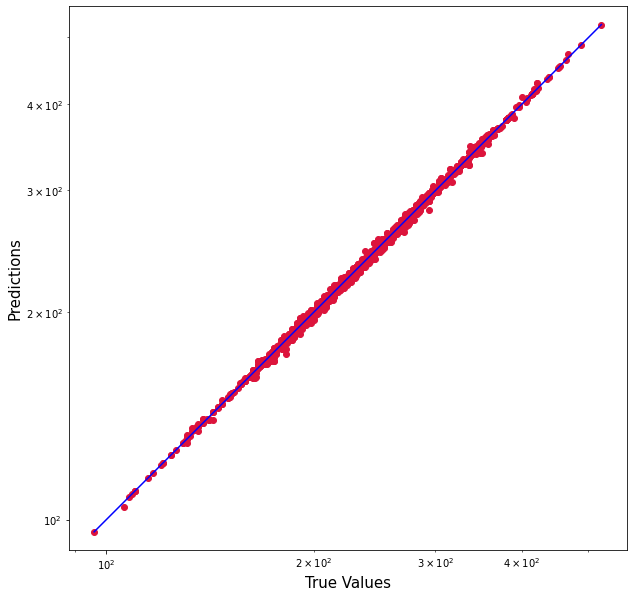

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()

Mean Absolute Error (MAE): 1.199

Mean Squared Error (MSE): 10.491

Root Mean Squared Error (RMSE): 3.239

R2_score: 0.996944

Root Mean Squared Log Error (RMSLE): 1.175

Mean Absolute Percentage Error (MAPE): 0.501 %

Adj R Square:  0.996941


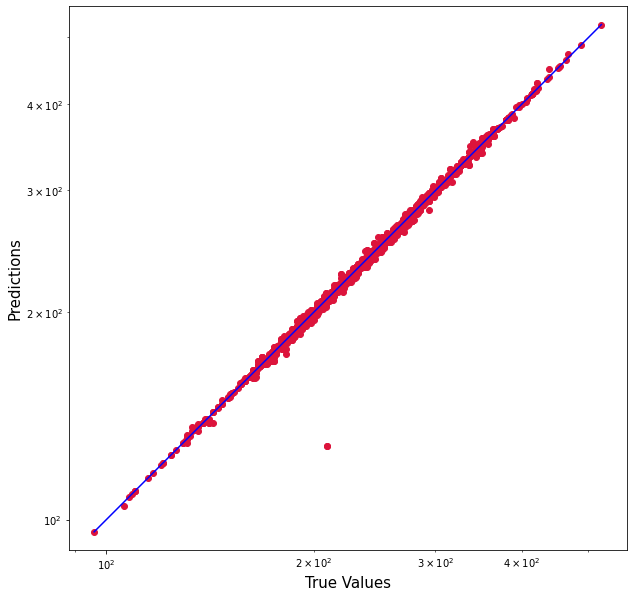

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()

Mean Absolute Error (MAE): 1.343

Mean Squared Error (MSE): 4.178

Root Mean Squared Error (RMSE): 2.044

R2_score: 0.998783

Root Mean Squared Log Error (RMSLE): 0.715

Mean Absolute Percentage Error (MAPE): 0.555 %

Adj R Square:  0.998782


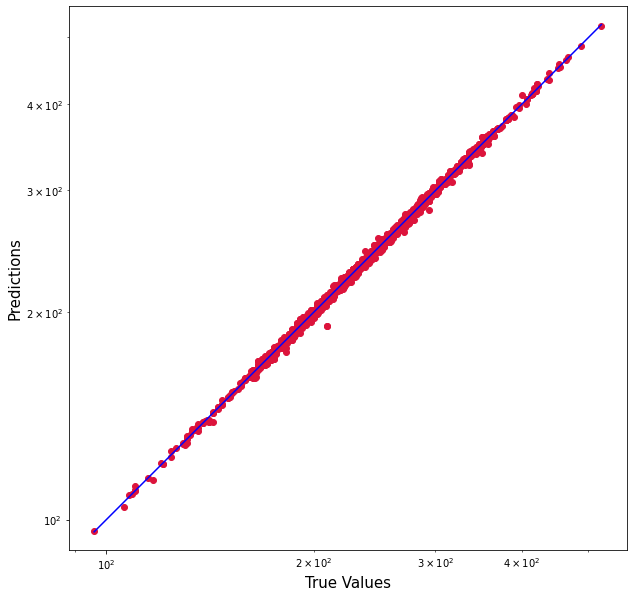

-----------------------------------------------------------------------------------------------------


In [38]:
best_models = [ModelET,ModelDT,ModelRF]
for models in best_models:
    
    # Fit the model
    
    models.fit(X_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn import metrics
    
    MAE = round(metrics.mean_absolute_error(y_test, y_pred),3)
    MSE = round(metrics.mean_squared_error(y_test, y_pred),3)
    RMSE =  round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3)
    R2_score =  round(metrics.r2_score(y_test, y_pred),6)
    RMSLE = round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)
    

    print('\nMean Absolute Error (MAE):', MAE)  
    print('\nMean Squared Error (MSE):', MSE)  
    print('\nRoot Mean Squared Error (RMSE):',RMSE)
    print('\nR2_score:',R2_score)
    print('\nRoot Mean Squared Log Error (RMSLE):', RMSLE)

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred): 
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    MAPE=round(result, 3)
    print('\nMean Absolute Percentage Error (MAPE):',MAPE , '%')

    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('\nAdj R Square: ', adjusted_r_squared)
    
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, y_pred, c='crimson')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    new_row = {'Model':models,
               'Mean absolute error(MAE)':MAE,
               'Mean square error(MSE)':MSE,
              'Root mean square erroe(RMSE)': RMSE,
              'R2_score': R2_score,
               'Root mean square log error(RMSLE)':RMSLE,
              'Mean absolute percentage error(MAPE)': MAPE,
              'Adjusted R square': adjusted_r_squared}
    FinalResults = FinalResults.append(new_row, ignore_index=True)

In [39]:
FinalResults.to_csv('FinalResults',index=False)
FinalResults.head(3)


,Model,Mean absolute error(MAE),Mean square error(MSE),Root mean square erroe(RMSE),R2_score,Root mean square log error(RMSLE),Mean absolute percentage error(MAPE),Adjusted R square
0,"(ExtraTreeRegressor(random_state=976898874), E...",1.090,3.737,1.933,0.998911,0.659,0.451,0.998910
1,DecisionTreeRegressor(),1.199,10.491,3.239,0.996944,1.175,0.501,0.996941
2,"(DecisionTreeRegressor(max_features='auto', ra...",1.343,4.178,2.044,0.998783,0.715,0.555,0.998782
